In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor

df = pd.read_csv('modelingdf.csv')
df = df.drop('Unnamed: 0', axis =1)

In [2]:
df.head()

,A,FC,G,GP,GS,MINS,OFF,R,SHTS,SOG,Y,season,club,position,next_year_compensation,name,current_compensation
0,0.0,7.0,0.0,8.0,5.0,460.0,3.0,0.0,8.0,3.0,0.0,2007,CLB,M,12900,brian plotkin,30000
1,4.0,28.0,3.0,30.0,11.0,1241.0,4.0,0.0,38.0,16.0,5.0,2007,CHI,F,63100,calen carr,50500
2,2.0,21.0,8.0,33.0,28.0,2181.0,37.0,0.0,65.0,41.0,3.0,2007,TFC,F,61273,chad barrett,48713
3,3.0,15.0,8.0,22.0,21.0,1721.0,5.0,0.0,44.0,22.0,1.0,2007,CHI,F,86075,chris rolfe,74700
4,0.0,43.0,1.0,26.0,24.0,2044.0,2.0,0.0,11.0,3.0,4.0,2007,CHI,D,44625,dasan robinson,42500


In [3]:
df = df.drop('name', axis=1)

In [4]:
df = pd.get_dummies(df)

In [5]:
df.shape

(2360, 53)

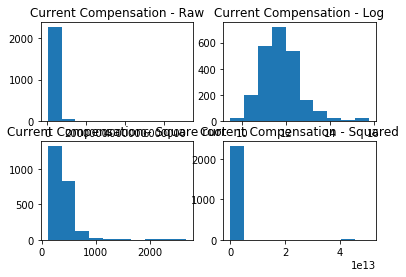

In [6]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (15,10)

fig.add_subplot(221)
plt.hist(df['current_compensation'].dropna())
plt.title('Current Compensation - Raw')

fig.add_subplot(222)
plt.hist(np.log(df['current_compensation'].dropna()))
plt.title('Current Compensation - Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['current_compensation'].dropna()))
plt.title('Current Compensation - Square root')

fig.add_subplot(224)
plt.hist((df['current_compensation']*df['current_compensation']))
plt.title('Current Compensation - Squared')
plt.show()

In [7]:
df['current_comp_log'] = np.log(df['current_compensation'])
df = df.drop('current_compensation', axis = 1)

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
Y_train = df_train['next_year_compensation']
X_test = df_test.loc[:, ~(df_test.columns).isin(['next_year_compensation'])]
Y_test = df_test['next_year_compensation']

In [9]:
linear = LinearRegression()
ridge = Ridge()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
theilsan = TheilSenRegressor()
ransac = RANSACRegressor()
huber = HuberRegressor()

In [10]:
df.next_year_compensation.describe()

count    2.360000e+03
mean     2.639321e+05
std      6.329589e+05
min      1.290000e+04
25%      7.857075e+04
50%      1.330625e+05
75%      2.178958e+05
max      7.115556e+06
Name: next_year_compensation, dtype: float64

In [11]:
def get_metrics(model, dataframe):
    x = dataframe.loc[:, ~(df_train.columns).isin(['next_year_compensation'])]
    y = dataframe['next_year_compensation']
    r2_scores = cross_val_score(model, x, y, cv=10)
    r2 = r2_scores.mean()
    mse_scores = cross_val_score(model,x,y, cv=10, scoring='neg_mean_squared_error')
    mse = mse_scores.mean() * -1
    rmse = np.sqrt(mse)
    print(model)
    print('R2 Score:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)

In [12]:
get_metrics(linear, df_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 Score: 0.464680532213
MSE: 189383587230.0
RMSE: 435182.245996


In [13]:
get_metrics(ridge,df_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 Score: 0.465677769388
MSE: 189108173277.0
RMSE: 434865.695678


In [14]:
get_metrics(gbr, df_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2 Score: 0.919913500406
MSE: 30712544138.4
RMSE: 175249.947613


In [15]:
get_metrics(rfr, df_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R2 Score: 0.9250555949
MSE: 36433621493.5
RMSE: 190875.932201


In [16]:
get_metrics(theilsan, df_train)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
         max_subpopulation=10000, n_jobs=1, n_subsamples=None,
         random_state=None, tol=0.001, verbose=False)
R2 Score: 0.377251044527
MSE: 238819411055.0
RMSE: 488691.529551


In [17]:
get_metrics(ransac, df_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)
R2 Score: 0.171404300497
MSE: 320411920937.0
RMSE: 566049.397966


In [18]:
get_metrics(huber, df_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
        tol=1e-05, warm_start=False)
R2 Score: 0.221449238984
MSE: 297789318602.0
RMSE: 545700.75921


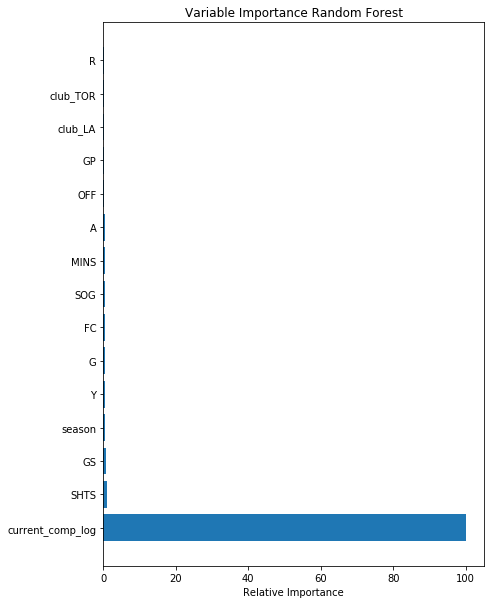

In [19]:
rfr.fit(X_train, Y_train)

feature_importance = rfr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance Random Forest')
plt.show()

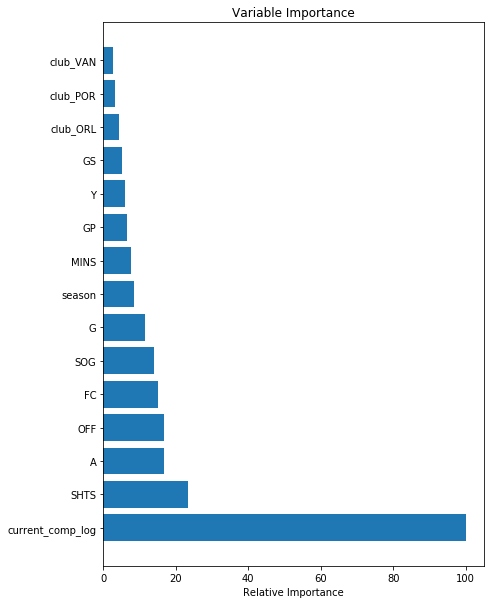

In [20]:
gbr.fit(X_train,Y_train)

feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:15], feature_importance[sorted_idx[0:15]], align='center')
plt.yticks(pos[0:15], X_train.columns[sorted_idx[0:15]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [21]:
huber.fit(X_train,Y_train)
print(huber.coef_)

[  1.51989976e+04  -7.63532828e+02   2.42923568e+04  -4.70813347e+03
  -4.22073812e+03   9.33445335e+01  -2.36160001e+03   2.00752742e+03
   3.31272846e+03  -1.07305919e+04   4.73065595e+03  -3.86629360e+02
   5.98124129e+02   1.78817454e+02  -1.53330441e+03  -2.80195379e+03
  -7.92396638e+02  -3.86107435e+01  -6.05504016e+02   1.04023092e+02
   1.24013108e+02  -2.05337708e+02   2.12170232e+02   1.77957865e+02
   1.04383290e+03  -3.81810840e+02   2.89659675e+02  -1.03871160e+03
   5.37136136e+02   5.72977143e+02   1.06006947e+03   6.78578352e+02
   1.00545347e+03   1.93243357e+02  -8.07259188e+02  -1.98457009e+03
   3.76826719e+02   1.30734997e+03   1.65890880e+03  -2.92630681e+03
  -1.27823563e+02   1.83164797e+02   9.15680693e+01   9.61982262e+02
   6.61486298e+02   4.24895436e+01   2.16768060e+03  -1.71865739e+02
  -9.54196790e+02  -1.10282649e+01   1.25324511e+01   7.82143076e+04]
